<a id='back'></a>

# Statistical Tests 

### Intro

### Table of Contents
* <a href='#samplez'>Large Sample z-test for a population proportion</a>
    * <a href='#samplez_hype'>Hypotheis Test</a>
    * <a href='#samplez_prop'>prop.test function in R</a>


* <a href='#samplez_diff'>Large Sample z-test for Difference in Proportion</a>
    * <a href='#hype_samplez_diff'>Hypotheis Test</a>
    * <a href='#prop_samplez_diff'>prop.test function</a>
    
    
* <a href='#samp_mean'>One sample t-test for population mean</a>
    * <a href='#samp_mean_hype'>Hypothesis test</a>
    
    
* <a href='#two_samp'>Two-sample tests</a>
    * <a href='#two_samp_ue'>Two sample independent t-test for unequal variance</a>
        * <a href='#two_samp_ue_hype'>Hypothesis Test</a>
        
    * <a href='#paired'>Paired t-test</a>
    

* <a href='#boot'>Bootstrap confidence intervals</a>


* <a href='#rand'>Randomization tests</a>


* <a href='#anova'>One-Way ANOVA</a>
    * <a href='#anova'>ANOVA Hyptothesis Testing</a>
    * <a href='#tukey'>Tukey HSD</a>
    * <a href='#anova_val'>Checking ANOVA assumptions are met</a>
    * <a href='#anova_res'>Results of ANOVA</a>
    

* <a href='#two_anova'>Two-Way ANOVA</a>
 

In [1]:
# Packages to load
library(tidyverse)
library(Lock5Data)
library(car)

Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.2"Warning message:
"package 'readr' was built under R version 3.4.2"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.3"Warning message:
"package 'forcats' was built under R version 3.4.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

The following object is masked from 'package:purrr':

 

<a id='samplez'></a>

## Large Sample z-test for a population proportion

The data set we are looking at is the ChickWeight data set from the datasets package. The columns are: 

weight - a numeric vector giving the body weight of the chick (gm)  

Time - a numeric vector giving the number of days since birth when the measurement was made.

Chick - an ordered factor with levels 18 < ... < 48 giving a unique identifier for the chick. The ordering of the levels groups chicks on the same diet together and orders them according to their final weight (lightest to heaviest) within diet.

Diet - a factor with levels 1, ..., 4 indicating which experimental diet the chick received.

The problem that we are going to be tackling is that in a sample of 220 chicks, after going through diet 1 it was found that a certain number of chicks had a weight greater than 130. The people that provided the diet for the farmer claims that more than 30% of the chicks will weight greater than 130 gm. Find the amount of chicks with a weight greater than 130 and using a significance level equal to .05, test whether this claim is accurate or not.

In [24]:
#Load in the data and look over a little bit of the data
data(ChickWeight)
head(ChickWeight)
str(ChickWeight)

weight,Time,Chick,Diet
42,0,1,1
51,2,1,1
59,4,1,1
64,6,1,1
76,8,1,1
93,10,1,1


Classes 'nfnGroupedData', 'nfGroupedData', 'groupedData' and 'data.frame':	578 obs. of  4 variables:
 $ weight: num  42 51 59 64 76 93 106 125 149 171 ...
 $ Time  : num  0 2 4 6 8 10 12 14 16 18 ...
 $ Chick : Ord.factor w/ 50 levels "18"<"16"<"15"<..: 15 15 15 15 15 15 15 15 15 15 ...
 $ Diet  : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "formula")=Class 'formula'  language weight ~ Time | Chick
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "outer")=Class 'formula'  language ~Diet
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "labels")=List of 2
  ..$ x: chr "Time"
  ..$ y: chr "Body weight"
 - attr(*, "units")=List of 2
  ..$ x: chr "(days)"
  ..$ y: chr "(gm)"


In [18]:
#Filter the data so we only are using chicks that went through diet 1 and chicks greater than 130
chick <- filter(ChickWeight, Diet == 1)
chick130 <- filter(ChickWeight, Diet == 1 & weight > 130)
sample_size <- nrow(chick)
greater130_size <- nrow(chick130)
alpha <- .05
prop  <- .30
test_prop <- greater130_size / sample_size
test_stat <- (test_prop - prop) / sqrt((prop * (1 - prop)) / sample_size)
p_value <- 1 - pnorm(test_stat)
conf_int <- c((test_prop - qnorm(1 - (alpha / 2)) * sqrt((test_prop * (1 - test_prop)) / sample_size)), (test_prop + qnorm(1 - (alpha / 2)) * sqrt((test_prop * (1 - test_prop)) / sample_size)))

In [19]:
# Results
test_prop
test_stat
p_value
conf_int

[1] 0.2681818

[1] -1.029857

[1] 0.8484615

[1] 0.2096418 0.3267219

<a id='samplez_hype'></a>

### Hypotheis Test  for Large Sample z-test for a population proportion

#### Assumptions:
For this test, observations $x_{1}$, . . . , $x_{n}$ (a sequence of 0’s and 1’s) are a
random sample from Bern(p) with p unknown and n is equal to the sample size.

The sample size n is large enough to ensure that n$p_{0}$ ≥ 15 and
n(1 − $p_{0}$) ≥ 15

#### Hypothesis:
$$H_{0}: p = .30$$

$$H_{a}: p > .30$$


#### Test Statistic:

$$z=\frac{\hat{p}-p_{0}}{\sqrt{\frac{p_{0}(1-p_{0})}{n}}}$$

$$z=-1.0298$$

#### P_value:
$$p-value = 0.848461501351687$$

#### Conclusion:
We fail to reject the null hypothesis at significance level of .05. This however does not mean we accept the alternative hypothesis and more testing need to be done

#### Confidence Interval:

$$\hat{p}\pm z_{(1-\alpha/2)}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

For a 95% confidence interval, we are 95% confident that p is in the interval (0.209641778346864, 0.326721858016773), however, the probability that p is in this interval is either 0 or 1. This means that if we were to do this experiment over and over again we are confident that 95% of the time the true population proportion is in this range.

<a id='samplez_prop'></a>

## Using R's prop.test

We can also use R's built in prop.test function if we know the probability ahead of time. The example we will use this time is tossing a coin. Lets say you toss the coin 500 times and it only landed heads 200 times. Test at a .05 significance level if the coin is fair or in other words if the probability of landing heads is not 50%.

In [62]:
## Prop.test
prop.test(x = 200, n = 500, p = 0.5, alternative = "two.sided", conf.level = .95)


	1-sample proportions test with continuity correction

data:  200 out of 500, null probability 0.5
X-squared = 19.602, df = 1, p-value = 9.537e-06
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.3570044 0.4445558
sample estimates:
  p 
0.4 


#### Explanation of the results

From the prop.test we get a nice layout of the results for the test. We see alternative hypothesis, p-value and the confidence interval as well. From this we can see that the p-value is much less than the .05 significance level and thus we reject the null hypothesis, and we conclude that there is enough statistical evidence to infer that the alternative hypothesis is true. 

<a id='samplez_diff'></a>

## Large Sample z-test for Difference in Proportion

The dataset we are looking at is the StatGrades dataset found in the Lock5Data package and it contains Stats test scores. The columns are:

Exam1: Score (out of 100 points) on the first exam

Exam2: Score (out of 100 points) on the second exam

Final: Score (out of 100 points) on the final exam

The problem that we are going to answer is if there is a greater chance that you will pass the first exam then the second exam where a passing grade is greater than or equal to 75.

In [3]:
#Look over the data
data(StatGrades)
head(StatGrades)
str(StatGrades)
summary(StatGrades)

Exam1,Exam2,Final
91,86,90
91,89,95
80,72,81
75,81,63
73,82,83
82,83,78


'data.frame':	50 obs. of  3 variables:
 $ Exam1: int  91 91 80 75 73 82 89 47 77 91 ...
 $ Exam2: int  86 89 72 81 82 83 89 50 74 93 ...
 $ Final: int  90 95 81 63 83 78 90 74 77 103 ...


     Exam1           Exam2           Final      
 Min.   :47.00   Min.   :50.00   Min.   : 60.0  
 1st Qu.:75.50   1st Qu.:78.00   1st Qu.: 80.0  
 Median :82.50   Median :86.00   Median : 87.5  
 Mean   :81.06   Mean   :83.12   Mean   : 85.5  
 3rd Qu.:89.00   3rd Qu.:90.00   3rd Qu.: 92.0  
 Max.   :98.00   Max.   :95.00   Max.   :103.0  

In [15]:
#Filter data
alpha <- .05
exam1_pass <- StatGrades %>% filter(Exam1 >= 75) %>% select(Exam1)
exam2_pass <- StatGrades %>% filter(Exam2 >= 75) %>% select(Exam1)
size_pass1 <- nrow(exam1_pass)
size_pass2 <- nrow(exam2_pass)
samp_size <- nrow(StatGrades)
samp_prop1 <- size_pass1 / samp_size
samp_prop2 <- size_pass2 / samp_size
p_hat  <- (size_pass1*samp_prop1 + size_pass2*samp_prop2)/(size_pass1 +size_pass2)
test_stat <- (samp_prop1 - samp_prop2) / sqrt(p_hat*(1-p_hat)*((1/size_pass1)+(1/size_pass2)))
p_value  <- 1 - pnorm(test_stat)
conf_int2 <- c((samp_prop1 - samp_prop2) - qnorm(1 - (alpha/2))*sqrt(((samp_prop1*(1-samp_prop1))/size_pass1) + ((samp_prop2*(1-samp_prop2))/size_pass2)), (samp_prop1 - samp_prop2) + qnorm(1 - (alpha/2))*sqrt(((samp_prop1*(1-samp_prop1))/size_pass1) + ((samp_prop2*(1-samp_prop2))/size_pass2)))
conf_int <- c((samp_prop1 - samp_prop2) - qnorm(1 - (alpha/2))*sqrt(p_hat*(1-p_hat)*((1/size_pass1)+(1/size_pass2))), (samp_prop1 - samp_prop2) + qnorm(1 - (alpha/2))*sqrt(p_hat*(1-p_hat)*((1/size_pass1)+(1/size_pass2))))

In [16]:
#Results
test_stat
p_value
conf_int
conf_int2

[1] -0.4717639

[1] 0.6814523

[1] -0.2061818  0.1261818

[1] -0.2063085  0.1263085

<a id='hype_samplez_diff'></a>

### Hypotheis Test  for Large Sample z-test for difference in proportions

#### Assumptions: 
$x_{11}$, . . . , $x_{1n_{1}}$ and $x_{21}$, . . . , $x_{2n_{2}}$
are random samples from two independent Bernoulli populations Bern($p_{1}$) and Bern($p_{2}$)
respectively with at least 10 successes and 10 failures in both groups.

$$ n_{1}\hat{p_{1}}\geq 10,\quad n_{1}(1−\hat{p_{1}})\geq 10 \quad and \quad n_{2}\hat{p_{2}}\geq 10,\quad n_{2}(1−\hat{p_{2}})\geq 10$$

#### Hypothesis
$$H_{0}: p_{1} - p_{2} = 0$$

$$H_{a}: p_{1} - p_{2} > 0$$

#### Test Statistic

$$z=\frac{\hat{p_{1}}-\hat{p_{2}}-0}{\sqrt{\hat{p}(1 - \hat{p})(1/n_{1} + 1/n_{2})}}$$

where $\hat{p} = (n_{1}\hat{p_{1}} + n_{2}\hat{p_{2}})/(n_{1} + n_{2})$

$$ z= -0.471763853242795$$

#### P-value

$$p-value = 0.68145232283435$$

#### Conclusion 

Because the p-value is found to be greater than the .05 significance level, we fail to reject the null hypothesis and we can not conclude whether or not the their is a higher chance to pass the first exam compared to the second one.

#### Confidence Interval

$$(\hat{p_{1}}-\hat{p_{2}})\pm z_{(1-\alpha/2)}SE$$

Where SE is the denominator of the test statistics (didn't want to write the Latex of it :p)

<a id='prop_samplez_diff'></a>

## Using prop.test

Just like in the large sample z test for population proportion we can do most of these calculation using prop.test except this time the parameters will be taking a list of the proportions and also each of the proportions sample size. We will have a nicely laid out example with all the values we need. Lets say we want to see if mean and women are equally likely to go to a a 4 year college after high school. 12000 people are sampled where 5622 are men and 6378 are women and out of those men 3004 went to college while 4234 went to college on the womens side. Test whether this claim is true.

In [24]:
men_coll <- 3004
women_coll <- 4234
samp_men <- 5622
samp_women <- 6378
prop.test(x = c(men_coll, women_coll), n = c(samp_men, samp_women), alternative = 'two.sided')


	2-sample test for equality of proportions with continuity correction

data:  c(men_coll, women_coll) out of c(samp_men, samp_women)
X-squared = 208.87, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1471301 -0.1119000
sample estimates:
   prop 1    prop 2 
0.5343294 0.6638445 


#### Results
From this we can now make a conclusion that with p-value less than the .05 significance value, we can reject the null hypothesis and conclude that there is statistical evidence towards the two population proportions not being equal. In other words males and females seem to not have the same proportion of going to college.

<a id='samp_mean'></a>

#### Disclaimer
In the following sections we will be focusing more on the functions and will not be writing out the formulas anymore (I got tired writing so much Latex haha). If you want to know the formulas pleas google them.

## One sample t-test for a population mean

The data set we will be using is the FloridaLakes dataset in the Lock5Data package and we will test to see if this sample provides evidence that the average alkalinity of all Florida lakes is greater than 40 mg/L. We will be using the t.test function in R

In [7]:
data(FloridaLakes)
head(FloridaLakes)
t.test(FloridaLakes$Alkalinity, alternative = 'greater', mu = 25)

ID,Lake,Alkalinity,pH,Calcium,Chlorophyll,AvgMercury,NumSamples,MinMercury,MaxMercury,ThreeYrStdMercury,AgeData
1,Alligator,5.9,6.1,3.0,0.7,1.23,5,0.85,1.43,1.53,1
2,Annie,3.5,5.1,1.9,3.2,1.33,7,0.92,1.90,1.33,0
3,Apopka,116.0,9.1,44.1,128.3,0.04,6,0.04,0.06,0.04,0
4,Blue Cypress,39.4,6.9,16.4,3.5,0.44,12,0.13,0.84,0.44,0
5,Brick,2.5,4.6,2.9,1.8,1.20,12,0.69,1.50,1.33,1
6,Bryant,19.6,7.3,4.5,44.1,0.27,14,0.04,0.48,0.25,1



	One Sample t-test

data:  FloridaLakes$Alkalinity
t = 2.3878, df = 52, p-value = 0.01031
alternative hypothesis: true mean is greater than 25
95 percent confidence interval:
 28.74199      Inf
sample estimates:
mean of x 
 37.53019 


<a id='samp_mean_hype'></a>

### Hypothesis test

#### Assumptions:

Observations $x_{1}$, . . . , $x_{n}$ are a random sample from the normal distribution N(µ, σ)

#### Hypothesis:

$$H_{0}: µ > 30$$
$$H_{a}: µ > 30$$

#### T-test:

$$ t = 2.3878$$

*We use this test when σ is not known

#### P-value:

$$ p-value = 0.01031$$

#### Conclusion:

Because the p-value is less than the .05 significance level, we can reject the null hypothesis and conclude that we have enough statistical evidence that the claim is true.


<a id='two_samp'></a>

## Two Sample t-test for difference in means

We will belooking mainly at two different ways to do this kind of test. The first will focus on when the two samples are independent and they both have unequal variance(Two-sample independent t-test). One example is the exam score of students trained with method 1 to those trained with method 2.

The second test we will be looking at is when the two samples are not independent and are connected with some sort of treatment or effect. For example, the before and after of students that got a certain learning program and see how well this program worked. This test is called the paired t-test.

<a id='two_samp_ue'></a>

### Two sample independent t-test for unequal variance

#### Rationale
Usually we would choose the test for unequal variance when there were unequal sample size between the independent sample and choose equal when there were equal sample sizes. However much research has been done on this topic and it has shown that the t-test for unequal variance for two independent samples(Welch Test) performs better than Student's t-test whenever sample sizes and variances are unequal between groups, and gives the same result when sample sizes and variances are equal. except when the sample sizes are very small(5 subjects or less). 

Great resource that looks more into this: http://daniellakens.blogspot.com.es/2015/01/always-use-welchs-t-test-instead-of.html

#### Example

We will be looking at the ColaCalcium dataset in the Lock5Data and the questions we will try to answer is if the calcium level in diet cola is greater than the calcium level in water.

In [14]:
##Review data and conduct test
data(ColaCalcium)
head(ColaCalcium)
str(ColaCalcium)
t.test(Calcium~Drink, ColaCalcium, alternative = 'greater')

Drink,Calcium
Diet cola,50
Diet cola,62
Diet cola,48
Diet cola,55
Diet cola,58
Diet cola,61


'data.frame':	16 obs. of  2 variables:
 $ Drink  : Factor w/ 2 levels "Diet cola","Water": 1 1 1 1 1 1 1 1 2 2 ...
 $ Calcium: int  50 62 48 55 58 61 58 56 48 46 ...



	Welch Two Sample t-test

data:  Calcium by Drink
t = 3.1732, df = 12.89, p-value = 0.003703
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 3.035583      Inf
sample estimates:
mean in group Diet cola     mean in group Water 
                 56.000                  49.125 


<a id='two_samp_ue_hype'></a>

### Hypothesis test

#### Assumptions:
Observations $x_{11}$, . . . , $x_{1n_{1}}$ and $x_{21}$, . . . , $x_{2n_{2}}$
are random samples from two distinct normal populations N($µ_{1}$, $σ_{1}$) and N($µ_{2}$, $σ_{2}$).

#### Hypothesis:

$$H_{0}: \mu_{1} - \mu_{2} = 0$$
$$H_{a}: \mu_{1} - \mu_{2} > 0$$

#### T-statistic:

$$t = 3.1732$$

#### P-value

$$p-value = 0.003703$$

#### Conclusion:







<a id="paired"></a>

### Paired t-test for difference in means

We will be using the Wetsuits dataset from the Lock5Data package. From this we will see whether their is a difference between the max velocity of swimmers swimming with a wetsuit and the smae swimmers swimming without one.

In [18]:
data(Wetsuits)
head(Wetsuits)
str(Wetsuits)
t.test(Wetsuits$Wetsuit, Wetsuits$NoWetsuit, paired = TRUE)

Wetsuit,NoWetsuit,Gender,Type
1.57,1.49,F,swimmer
1.47,1.37,F,triathlete
1.42,1.35,F,swimmer
1.35,1.27,F,triathlete
1.22,1.12,M,triathlete
1.75,1.64,M,swimmer


'data.frame':	12 obs. of  4 variables:
 $ Wetsuit  : num  1.57 1.47 1.42 1.35 1.22 1.75 1.64 1.57 1.56 1.53 ...
 $ NoWetsuit: num  1.49 1.37 1.35 1.27 1.12 1.64 1.59 1.52 1.5 1.45 ...
 $ Gender   : Factor w/ 2 levels "F","M": 1 1 1 1 2 2 2 2 2 2 ...
 $ Type     : Factor w/ 2 levels "swimmer","triathlete": 1 2 1 2 2 1 1 2 2 2 ...



	Paired t-test

data:  Wetsuits$Wetsuit and Wetsuits$NoWetsuit
t = 12.318, df = 11, p-value = 8.885e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.06365244 0.09134756
sample estimates:
mean of the differences 
                 0.0775 


### Conclusion

The p-value found was less than the .05 significane level, thus we can reject the null hypotheis that the difference in means is equal to 0 and conclude that the true differnece between the two methods is not equal to 0. We see that their is a difference when swimming withthe wetsuit and without the wetsuit.

<a id='boot'></a>

## Randomization Test(Monte Carlo Permutation test)

Randomization tests rely on fewer assumptions than do common parametric tests (such as the t-test) and so can be used when
requirements for parametric tests are not satisfied, and they can sometimes be more powerful than common
rank-based nonparametric tests and so also can be used when typical nonparametric tests are not desired.

We will be seing how powerful the test is in comparison to a one sample t-test and also look at how to implment a randomization test and the bootstrap confidence interval in R.

### Bootstrap confidence interval

We use the bootstrap confidence interval on some values of samples such as st. dev., correlation, and other metrics in order to get the sampling distribution from one samaple without the need to have assumptions met that usually are very loosely met. We will be looking at how to code this confidence interval in R.

(1-α)% confidence interval using t distribtution(we can use other distributions too:

$$Stat_{PE}\pm t_{1-\alpha/2,n-1}*SE_{boot}$$

In [18]:
#By Hand
#### First get Freedman dataset from cars library
data(Freedman)
summary(Freedman)
Freedman <- na.omit(Freedman)

'data.frame':	110 obs. of  4 variables:
 $ population: int  675 713 NA 534 1261 1330 331 1981 315 305 ...
 $ nonwhite  : num  7.3 2.6 3.3 0.8 1.4 22.8 7 21.6 20.7 0.6 ...
 $ density   : int  746 322 NA 491 1612 770 41 877 240 147 ...
 $ crime     : int  2602 1388 5018 1182 3341 2805 3306 4256 2117 1063 ...


   population         nonwhite        density            crime     
 Min.   :  270.0   Min.   : 0.30   Min.   :   37.0   Min.   : 458  
 1st Qu.:  398.8   1st Qu.: 3.40   1st Qu.:  266.5   1st Qu.:2067  
 Median :  664.0   Median : 7.20   Median :  412.0   Median :2698  
 Mean   : 1136.0   Mean   :10.80   Mean   :  765.7   Mean   :2714  
 3rd Qu.: 1167.8   3rd Qu.:14.88   3rd Qu.:  773.2   3rd Qu.:3305  
 Max.   :11551.0   Max.   :64.30   Max.   :13087.0   Max.   :5441  
 NA's   :10                        NA's   :10                      

In [23]:
#We have omitted all the NA values now lets find the correlation between density  and the crime for a city
summary(Freedman)
cor(Freedman$density, Freedman$crime)
nrow(Freedman)

   population         nonwhite        density            crime     
 Min.   :  270.0   Min.   : 0.30   Min.   :   37.0   Min.   : 458  
 1st Qu.:  398.8   1st Qu.: 3.40   1st Qu.:  266.5   1st Qu.:2100  
 Median :  664.0   Median : 7.30   Median :  412.0   Median :2762  
 Mean   : 1136.0   Mean   :10.66   Mean   :  765.7   Mean   :2733  
 3rd Qu.: 1167.8   3rd Qu.:14.82   3rd Qu.:  773.2   3rd Qu.:3318  
 Max.   :11551.0   Max.   :64.30   Max.   :13087.0   Max.   :5441  

[1] 0.1122283

[1] 100

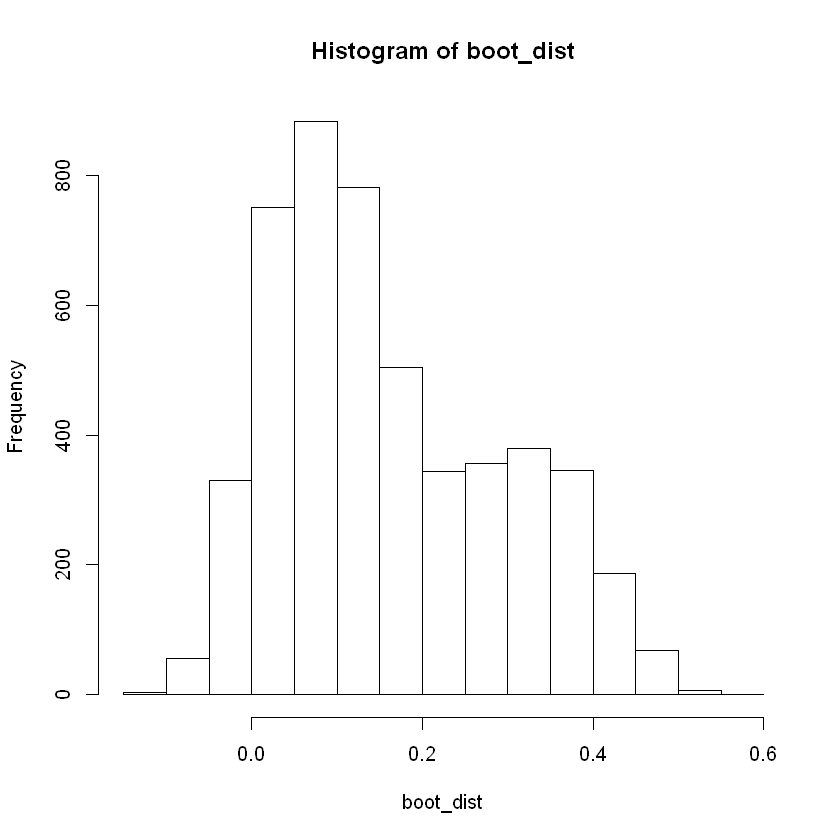

In [34]:
#Not that much of a correlation now lets make a bootstrap confidence interval for the correlation
cor_boot <- function(num_boot, samp_size, x, y){
    
    boot_dist <- rep(NA, num_boot)
    #Dont usually want to use for loops in R, will later fix to apply function
    for (i in 1:num_boot){
        #Sample with replacement the sample size 
        boot_sample<-sample(samp_size, replace = TRUE)
        #For each of the samples we find the correlations and put it into the list
        boot_dist[i]<-cor(x[boot_sample], y[boot_sample])
    }
    
    hist(boot_dist)
    return(boot_dist)
}

boot_dist <- cor_boot(5000, nrow(Freedman), Freedman$density, Freedman$crime)

In [36]:
#Sample correlation +- t * se of the bootstrap dist
cor(Freedman$density,Freedman$crime)+c(-1,1)*qt(0.975,nrow(Freedman))*sd(boot_dist)

[1] -0.1513965  0.3758530

#### Interpretation of results
We are 95% confident that the true correlation between density and crime is between the values -0.1514 and 0.3758.

<a id='rand'></a>

### Randomization test

Why use it - Dont have to assume a distribution and does not need to be randomly sampled however it nevertheless remains important for randomization tests that the data come from an experiment in which experimental units have been randomly assigned to treatments. We will first go over some topics such as Type 1 and Type 2 error and then do a power analysis to see how it does compared to its conunterpart test.

#### Formal Definitions

Type 1 error - the error of rejecting a null
hypothesis when it is actually true.

Type 2 error - the error of not rejecting a null
hypothesis when the alternative hypothesis is true.

Statistical Power - The power of a study is the likelihood that it will distinguish an effect of a certain size from pure luck. Also 1 - Type 2 error.

#### How to do a randomization test for one sample

The problem we are looking at is levels of toxins in different food products. We only get a couple of samples (6) and we need to find out if the products have a mean level greater than 80. Because the one sample t-test for population mean has its assumption of sample size violated so we use the randomization test

In [54]:
# Find the sample mean of the samples
toxin <- c(68, 75, 81, 93, 95, 134)
set.seed(123)
doRandTestOne <- function(samples, times, null){
    
    rand_dist <- rep(NA,times)
    #Adjust value in the original sample by 91-80 = 11 to center
    adjusted <- samples - (mean(samples) - null)
    for(i in 1:times){
        
        rand_sample <- sample(length(samples),replace = TRUE)
        rand_dist[i] <- mean(adjusted[rand_sample])
    }
    #Determine the proportion of samples greater than the original mean, 91
    p_value <- mean(rand_dist >= mean(samples))
    
    return(p_value)
}

doRandTestOne(toxin, 10000, 80)

[1] 0.1166

In [ ]:
####Using the function


<a id='anova'></a>

## ANOVA

ANOVA is a statistical test where we want to figure out if there is a difference in means between three or more populations. We do this instead of doing multiple t-tests because of the type 1 error that increases when you do multiple testing.

Some assumptions that need to be met are:
• Each group is a random sample from their population
• Groups are independent and observations are independent
• Observations within each group are normally distributed
• Variance of each group is equal (homoscedasticity)

Assumptions however can be 

For hypothesis testing we will be using the F-statistic which is the ratio of the variability between groups and variability within groups. This follows a F distribution that is right skewed, non-negative, and has 2 df's.

We will be lookin at a example where we compare differnent kinds of fillings to how many ants come to the sandwich with that filling and see if there is a noticeable difference between filling types

In [2]:
data(SandwichAnts)
head(SandwichAnts)
one.way.anova <- aov(Ants ~ Filling, data = SandwichAnts)
summary(one.way.anova)
summary.lm(one.way.anova)

Butter,Filling,Bread,Ants,Order
no,Vegemite,Rye,18,10
no,Peanut Butter,Rye,43,26
no,Ham & Pickles,Rye,44,39
no,Vegemite,Wholemeal,29,25
no,Peanut Butter,Wholemeal,59,35
no,Ham & Pickles,Wholemeal,34,1


            Df Sum Sq Mean Sq F value Pr(>F)  
Filling      2   1561   780.5   5.627  0.011 *
Residuals   21   2913   138.7                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
aov(formula = Ants ~ Filling, data = SandwichAnts)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.250 -10.312   0.000   9.188  25.000 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            49.250      4.164  11.827 9.51e-11 ***
FillingPeanut Butter  -15.250      5.889  -2.590  0.01710 *  
FillingVegemite       -18.500      5.889  -3.142  0.00493 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.78 on 21 degrees of freedom
Multiple R-squared:  0.3489,	Adjusted R-squared:  0.2869 
F-statistic: 5.627 on 2 and 21 DF,  p-value: 0.01105


<a id='tukey'></a>

### Tukey HSD Test for Multiple pairwise-comparison between the means of groups

In [3]:
## Rationale is to determine if the mean difference between specific pairs of group are statistically significant
TukeyHSD(one.way.anova)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Ants ~ Filling, data = SandwichAnts)

$Filling
                              diff       lwr        upr     p adj
Peanut Butter-Ham & Pickles -15.25 -30.09326 -0.4067363 0.0433492
Vegemite-Ham & Pickles      -18.50 -33.34326 -3.6567363 0.0131006
Vegemite-Peanut Butter       -3.25 -18.09326 11.5932637 0.8466376


<a id='anova_val'></a>

### Checking Assumptions

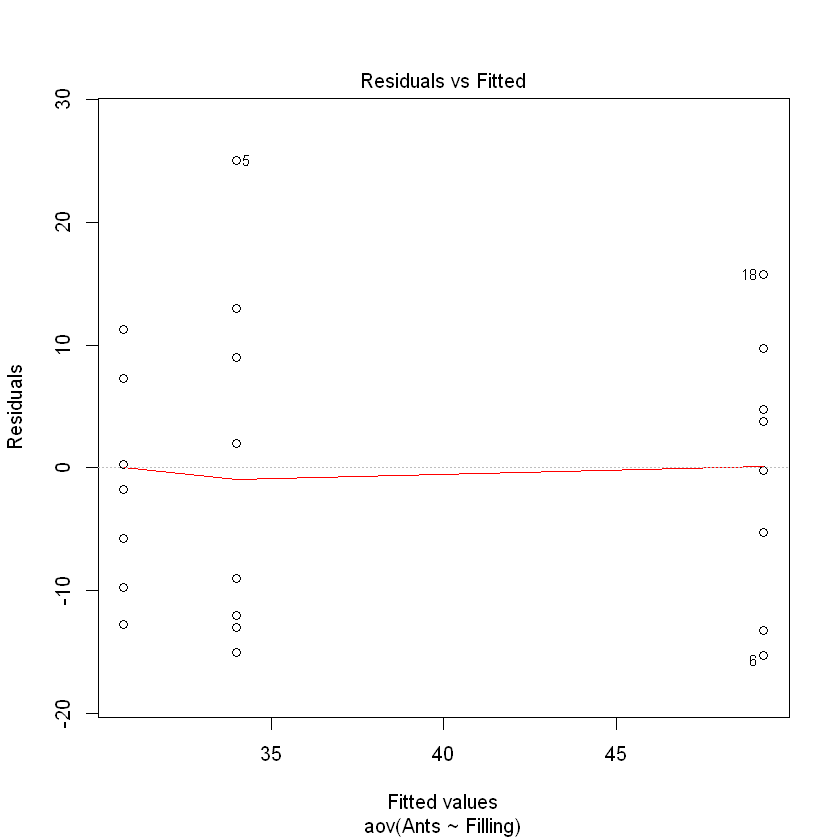

In [13]:
#Equal variance for all filling groups
plot(one.way.anova, 1)

In [14]:
##From graph it looks like it might not be supported so we do the Levene test from the car library to make sure
leveneTest(Ants~Filling, data = SandwichAnts)

,Df,F value,Pr(>F)
group,2,1.298213,0.2940473
,21,NA,NA


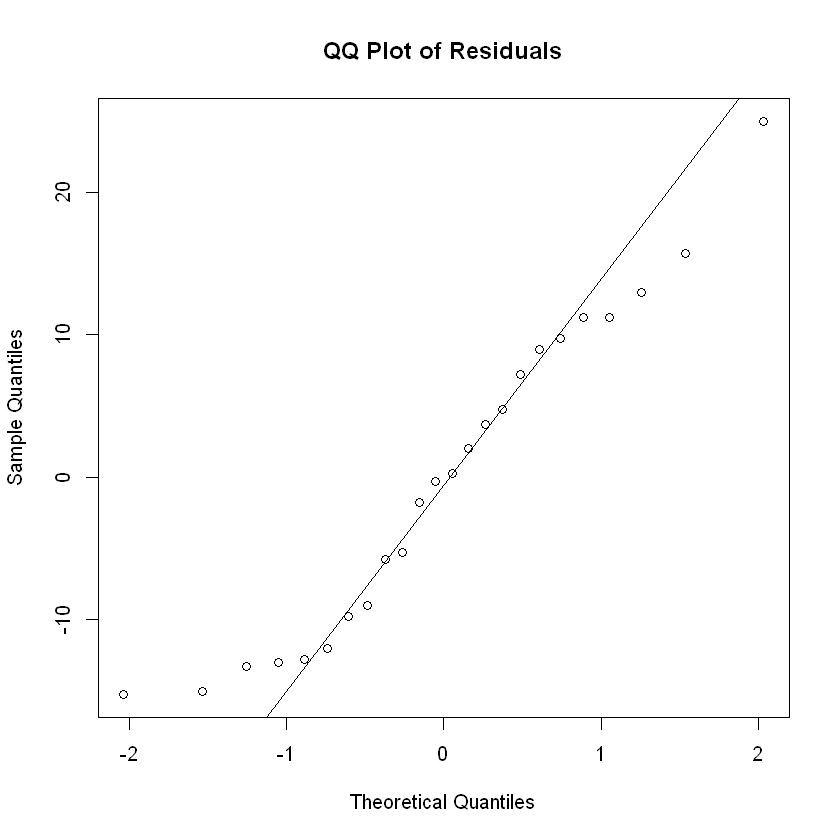

In [18]:
# Now to check if the residuals follow a normal distribtution
# Extract the residuals
res <- residuals(one.way.anova)
qqnorm(res, main = "QQ Plot of Residuals")
qqline(res)

In [19]:
# Does not look like it does so we do the Shapiro-Wilks test to make sure
# Run Shapiro-Wilk test
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.94685, p-value = 0.2313


<a id='anova_res'></a>

### Results 

From looking at the table after conducting the ANOVA test on the different groups we get a p-value that is less than the .05 significance level thus we can reject the null hypothesis an conclude their is statistical evidence that theres a difference in means in the different filling types. 

In terms of the specific kinds of pairing between fillings we see from the Tukey HSD test that Peanut Butter-Ham vs Pickles and
Vegemite-Ham vs Pickles had p-values that were less than the .05 significance level meaning there was seen to be a significant difference between those pairs means while the Vegemite vs Peanut Butter did not have enough statistical evidence to find a difference in the sample means

When validating the assumptions of ANOVA we need to see if the variances are homoschedastic or equal between the different filling types. Using the Levene test we find a p-value greater than the significance level thus we cannot reject the null hypothesis that the variancees are equal. We also look at the residuals and we need to find that the distribution is normal. We do the Shapiro-Wilks normality test and we find that the p-value is greater than the .05 significance level thus we cannot reject the null hypothesis that the residual are normal.

<a id='two_anova'></a>

## Two Way ANOVA

<a href='#back'>Back to the top</a>